# Generate Beam-Related Neutron (BRN)

In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the BRN spectrum

In [2]:
filename = '/Users/yuntse/data/coherent/preLArTPC/mcnp/BRN_400M_100cm_1e5.root'
f = ROOT.TFile( filename, 'READ')

In [3]:
hBRN = f.Get("1")

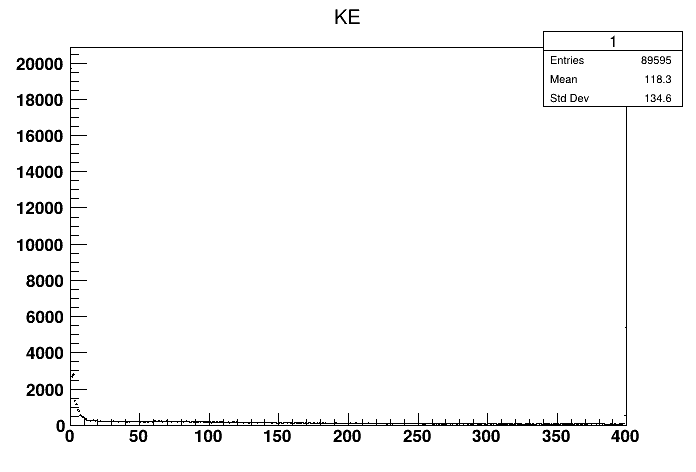

In [4]:
canvas = ROOT.TCanvas("c1", "BRN KE")
hBRN.Draw()
canvas.Draw()

In [5]:
brn = np.array([ hBRN.GetBinContent(i+1) for i in range(hBRN.GetNbinsX()) ])
brn_bins = np.array([ hBRN.GetBinLowEdge(i+1) for i in range(hBRN.GetNbinsX() + 1) ])

In [6]:
brn

array([19716.,  2688.,  2803.,  1351.,  1160.,   868.,   767.,   552.,
         489.,   445.,   356.,   330.,   275.,   255.,   247.,   271.,
         282.,   257.,   249.,   248.,   203.,   223.,   205.,   220.,
         207.,   215.,   210.,   213.,   210.,   201.,   210.,   223.,
         213.,   215.,   190.,   209.,   199.,   205.,   202.,   192.,
         190.,   193.,   184.,   210.,   205.,   199.,   214.,   210.,
         211.,   211.,   195.,   202.,   193.,   193.,   191.,   194.,
         196.,   205.,   209.,   183.,   224.,   223.,   217.,   237.,
         223.,   233.,   188.,   198.,   199.,   227.,   221.,   214.,
         185.,   212.,   217.,   210.,   204.,   183.,   211.,   212.,
         218.,   191.,   206.,   228.,   205.,   200.,   163.,   194.,
         190.,   186.,   175.,   185.,   190.,   195.,   208.,   186.,
         185.,   177.,   185.,   191.,   199.,   138.,   183.,   170.,
         160.,   184.,   163.,   177.,   183.,   176.,   180.,   169.,
      

In [7]:
brn_bins

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [8]:
brn.sum()-72.-70.-110.-545.-5399.

79369.0

## Generate BRN Kinetic Energy

In [9]:
rng = np.random.default_rng()

In [10]:
def getNSamples(xmin, xmax, N):
    return rng.uniform(xmin, xmax, N)

In [11]:
def isAccepted(n, vPDF, maxPDF):
    return rng.uniform(0., maxPDF, n) < vPDF

In [12]:
def rejectSampling(kemin, kemax, nSamples):
    outSamples = getNSamples(kemin, kemax, nSamples)
    outSampleBins = np.floor(outSamples).astype(int)
    outPDF = brn[outSampleBins]
    maxPDF = brn[0]

    mask = isAccepted(len(outSamples), outPDF, maxPDF)
    reject, = np.where(~mask)

    while reject.size > 0:
        fill = getNSamples(kemin, kemax, reject.size)
        fillBins = np.floor(fill).astype(int)
        
        fillPDF = brn[fillBins]
        mask = isAccepted(len(fill), fillPDF, maxPDF)
        outSamples[reject[mask]] = fill[mask]
        reject = reject[~mask]

    return outSamples

In [13]:
nSamples = 500000
voutSamples = rejectSampling(0., 395., nSamples)
len(voutSamples)

500000

In [14]:
voutSamples

array([3.02239382e-01, 2.50991502e-01, 2.39990307e+01, ...,
       1.06049160e+00, 1.95912198e-01, 3.89008872e+02])

## Validation

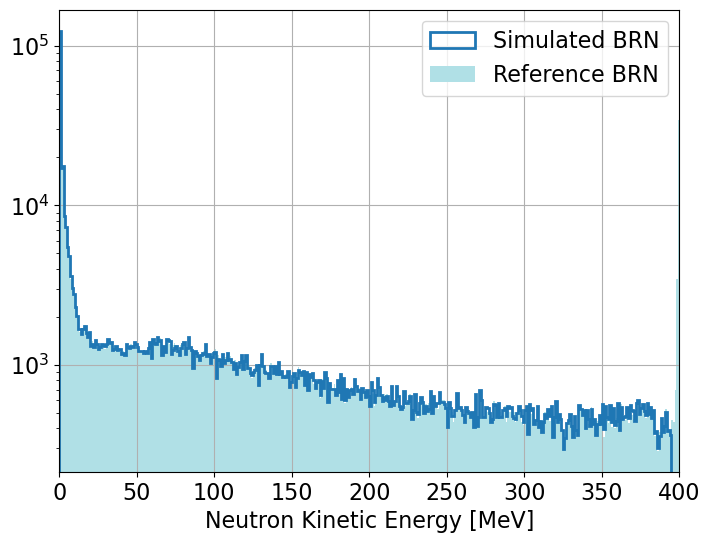

In [15]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(voutSamples, bins = np.linspace(0, 400, 401), histtype = 'step', lw = 2, label = 'Simulated BRN')
ax.bar(brn_bins[:-1], brn*nSamples/79369., width = np.diff(brn_bins), align = "edge", 
       color = 'powderblue', label = 'Reference BRN')
ax.set_xlabel( 'Neutron Kinetic Energy [MeV]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 400])
ax.semilogy()
ax.grid(':')
ax.legend( fontsize = 16)
fig.savefig('BRNSpectrum.pdf')

In [16]:
outHist = np.histogram(voutSamples, bins = np.linspace(0, 395, 396))
outHist

(array([124238,  17208,  17589,   8577,   7332,   5485,   4786,   3584,
          3025,   2786,   2304,   2026,   1672,   1675,   1563,   1668,
          1746,   1586,   1488,   1596,   1312,   1350,   1299,   1436,
          1347,   1266,   1290,   1351,   1324,   1309,   1345,   1459,
          1378,   1391,   1231,   1258,   1304,   1248,   1253,   1262,
          1176,   1194,   1155,   1353,   1289,   1276,   1322,   1287,
          1382,   1350,   1289,   1227,   1228,   1220,   1179,   1222,
          1185,   1267,   1389,   1111,   1445,   1379,   1354,   1502,
          1411,   1440,   1148,   1317,   1203,   1457,   1434,   1403,
          1170,   1248,   1276,   1322,   1218,   1156,   1271,   1349,
          1382,   1166,   1270,   1486,   1291,   1248,    962,   1218,
          1190,   1144,   1075,   1156,   1181,   1178,   1345,   1129,
          1164,   1032,   1114,   1180,   1208,    832,   1091,   1072,
           990,   1164,   1031,   1071,   1179,   1072,   1085, 

In [17]:
ref = brn[:-5]*nSamples/79369.
len(ref)

395

In [18]:
len(outHist[0])

395

In [19]:
trim_bins = brn_bins[:-5]

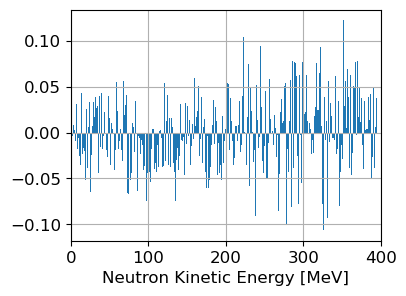

In [20]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.bar(brn_bins[:-6], (outHist[0]-ref)/ref, width = np.diff(brn_bins[:-5]), align = "edge")
ax.set_xlabel( 'Neutron Kinetic Energy [MeV]', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 400])
# ax.semilogy()
ax.grid(':')

## Fill the output ROOT file

In [21]:
from array import array

In [22]:
nPdg = 2112
# unit: MeV
nMass = 939.5654205

In [23]:
nEventPerFile = 10000
nFiles = int(nSamples/nEventPerFile)
nFiles

50

In [24]:
outdir = '/Users/yuntse/data/coherent/preLArTPC/mcnp/brn500K'

In [25]:
iFile = 0

for i in range(nSamples):
    if i%nEventPerFile == 0:
        iFile = int(i/nEventPerFile)
        outFile = f'{outdir}/brn_{iFile:04d}.root'
        
        f = ROOT.TFile(outFile, "RECREATE")
        t = ROOT.TTree("kin", "Beam Related Neutron")
        
        # Declare the variables
        event = array( 'i', [0] )
        vpdg = ROOT.std.vector('int')()
        vE   = ROOT.std.vector('double')()
        vpx  = ROOT.std.vector('double')()
        vpy  = ROOT.std.vector('double')()
        vpz  = ROOT.std.vector('double')()
        vm   = ROOT.std.vector('double')()

        # Set the branches
        t.Branch('event', event, 'event/I')
        t.Branch('pdg', vpdg)
        t.Branch('E', vE)
        t.Branch('px', vpx)
        t.Branch('py', vpy)
        t.Branch('pz', vpz)
        t.Branch('m', vm)

    vpdg.clear()
    vE.clear()
    vpx.clear()
    vpy.clear()
    vpz.clear()
    vm.clear()

    event[0] = i
    
    # Calculate the 4-momentum
    E = voutSamples[i]+nMass
    p = np.sqrt( E**2 - nMass**2 )
    px = 0.
    py = p
    pz = 0.
    
    vpdg.push_back( nPdg )
    vE.push_back( E )
    vpx.push_back( px )
    vpy.push_back( py )
    vpz.push_back( pz )
    vm.push_back( nMass )
    
    t.Fill()
    
    if (i%nEventPerFile == nEventPerFile-1):
        print( f'saving event {i} in file {iFile}....')
        f.Write()
        f.Close()

saving event 9999 in file 0....
saving event 19999 in file 1....
saving event 29999 in file 2....
saving event 39999 in file 3....
saving event 49999 in file 4....
saving event 59999 in file 5....
saving event 69999 in file 6....
saving event 79999 in file 7....
saving event 89999 in file 8....
saving event 99999 in file 9....
saving event 109999 in file 10....
saving event 119999 in file 11....
saving event 129999 in file 12....
saving event 139999 in file 13....
saving event 149999 in file 14....
saving event 159999 in file 15....
saving event 169999 in file 16....
saving event 179999 in file 17....
saving event 189999 in file 18....
saving event 199999 in file 19....
saving event 209999 in file 20....
saving event 219999 in file 21....
saving event 229999 in file 22....
saving event 239999 in file 23....
saving event 249999 in file 24....
saving event 259999 in file 25....
saving event 269999 in file 26....
saving event 279999 in file 27....
saving event 289999 in file 28....
saving